In [ ]:
%load_ext autoreload
%autoreload 2
import data
import data_prepro as pre 
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import scienceplots
from pathlib import Path
import portfolio_trade as pt


In [ ]:
df = data.load_process()

In [ ]:
df.columns

In [ ]:
!pwd

In [ ]:
%cd ..

In [ ]:
data_dir = Path.cwd()/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [ ]:
df_dict['10'].tail(50)

In [ ]:
sp500ret = pd.read_csv('/Users/minhquangngo/documents/vsc/erasmus/msc_thesis/data/sp500daily_ret_2018.csv')

In [ ]:
sp500ret = sp500ret.iloc[:-1, :]
sp500ret.shape

In [ ]:
sp500ret.shape

In [ ]:
sp500ret.index = pd.to_datetime(sp500ret['DlyCalDt'])
sp500ret = sp500ret.drop(columns=['DlyCalDt'])
sp500ret.head()

Unconstrained

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'ret')._weighted_portfolios()

In [ ]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'excess_ret')._weighted_portfolios()

Constrained

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'constrained',return_type= 'ret')._weighted_portfolios()

In [20]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'constrained',return_type= 'excess_ret')._weighted_portfolios()

Data directory: data
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_time': 1750691701929, 'lifecycle_stage': 'active', 'name': 'baseline

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}, {'7275b18c4dc64f37962e606b0a6babe7': '10_baseline'}, {'2a60e4c4bfe14083b7253a46eba2249b': '10_baseline'}, {'6a3dfca321be412d979adeb1517fc2ca': '10_rf'}, {'ee13a17c42b446a8bd06a2af9869ffc7': '10_rf'}, {'8605b519c8ff45c99ed6f05b9c3f0758': '10_enhanced'}, {'5e97ee700e1b4c4c8512035e9c35a54e': '10_rf_enhanced'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}]
Data
[{'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'556ab09491dd4049919c8be557a56767': '10_rf_enhanced'}, {'631d31fae9f24734a85753d68cd3b973': '10_enhanced'}, {'5bbbfc410f104d979913c3698d4a7720': '10_rf'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}]


sector_and_run: {'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/c192639fe0474c92a6c9a

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'8b3fc19c43e04d9185a73bbcb20fca53': '15_enhanced'}, {'4aeb3afd42684b98a64cc2501139e1c5': '15_baseline'}, {'496e6583629c431da326f5ecc29c115d': '15_baseline'}, {'593de3ec6401482aaad619ccec7c4402': '15_rf'}, {'0942d7e086b24f0d94822ee405c20c2d': '15_rf'}, {'175e3a26baf549e098bb7c61fbdbda2c': '15_enhanced'}, {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}, {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '15_rf_enhanced'}]
Data
[{'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'958f2912cd7c41489da642e8e147fa62': '15_rf_enhanced'}, {'651f0a3511b04e4e8847af7b405c59ad': '15_enhanced'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'6a0948d947bd479b826d5b8d4363269f': '15_rf'}]


sector_and_run: {'8b3fc19c43e04d9185a73bbcb20fca53': '15_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/8b3fc19c43e04d9185a73

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


run: [{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'9d9468eabb714a53926ac43a2a01ac69': '25_baseline'}, {'3359015cf9ad4f85af79ca6649965b29': '50_baseline'}, {'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'3d4109292cbb4d039b3f514023d8114c': '20_baseline'}, {'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'504c6881465c461eb22734a8ecf1c490': '35_baseline'}]




run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'d8cf4a82a14442f8badb505cb3b89d27': '20_enhanced'}, {'1068d592c6eb4504bd15a175ad8dc3b1': '20_baseline'}, {'3a984d5298544aa4903e8bd841e6d0b8': '20_baseline'}, {'ff1bfc28d1f04a32b5df31f1b56fe5b5': '20_rf'}, {'7ab6f1738b6442219d49777164148ef0': '20_rf'}, {'cdaed9f98783471c8d17f9b3d1ec0861': '20_enhanced'}, {'0ad6a3d993e143448c8ab436b2f2610b': '20_rf_enhanced'}, {'5470f1204cf5403eb0efb49a772677d1': '20_rf_enhanced'}]
Data
[{'3d4109292cbb4d039b3f514023d8114c': '20_baseline'}, {'203c08adb6bd4c3e8e243d7cb1b1a425': '20_rf_enhanced'}, {'91234a2e367546849d1940790ab7258e': '20_baseline'}, {'5451a961b19045b995511497ad5db615': '20_rf_enhanced'}, {'c3e86675fe27494c9e1e0c24edaf253b': '20_enhanced'}, {'b6939fdbca254189bd06d82fc60461b4': '20_rf'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}]


sector_and_run: {'d8cf4a82a14442f8badb505cb3b89d27': '20_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/d8cf4a82a14442f8badb5

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a fu

run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'203c08adb6bd4c3e8e243d7cb1b1a425': '20_rf_enhanced'}]




run: [{'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'864a6d9eb61441f88bc731e6eb3ff9e1': '25_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/864a6d9eb61441f88bc731e6eb3ff9e1/artifacts
Signal csv path: mlartifacts/817788886064538782/864a6d9eb61441f88bc731e6eb3ff9e1/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'bb9b6c909b104b3aa29e70f51979fb5d': '25_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/bb9b6c909b104b3aa29e70f51979fb5d/artifacts
Signal

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'a2a90841257c498db185adf7ee62cb80': '30_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/a2a90841257c498db185adf7ee62cb80/artifacts
Signal csv path: mlartifacts/468973451922201767/a2a90841257c498db185adf7ee62cb80/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'d284276b82894415a231156c121d1479': '30_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/d284276b82894415a231156c121d1479/artifacts
Signal csv path: mlartifacts/311565507127226983/d284276b82894415a231156c121d1479/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'a2872e280ae84055a6e2de6d0c2b8b08': '384549839577262961_bce05aa1af2249dbbb6cf87421a1c7f5'}, {'7ab6f1738b6442219d49777164148ef0': '384549839577262961_b6939fdbca254189bd06d82fc60461b4'}, {'c0d1ad93f5ac4af18d982f29383e2879': '384549839577262961_3add7c5b9b6147768b3a1136282002b7'}, {'b0e98b75903e460285dc1bb41ac8ad66': '384549839577262961_db9006dc6c93443f98a083e7e50648a6'}, {'f16dd3e44eae4ad08b7221f40760bdfe': '384549839577262961_a0bd5cfadeb54cc7b5b7d6a562b199b1'}, {'ebe6778f1f9c419e997eedc8a4e29cc7': '384549839577262961_35b1cfb5874847e6ba24dc297f99d09e'}, {'0942d7e086b24f0d94822ee405c20c2d': '384549839577262961_83013ac4e4cb45feb0c84642e8671eef'}, {'e6b315f8b85b4f849fbb6c808a67441d': '384549839577262961_6ada7d0442fb46f3b35964b0ab863df6'}, {'775a5af85a7946e89e211700e8367878': '384549839577262961_d25f11c8262b4a6881d39c556c960271'}, {'864a6d9eb61441f88bc731e6eb3ff9e1': '384549839577262961_0de214884a5e42b2b449d8d022c1dcdd'}, {'ee13a17c42b446a8bd06a2af9869ffc7': '384549839577262961_5bbbfc4

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'268d07a3a63e4b569e0c3ef101985a3f': '556603403257092514_b02f9e6c6c14446eb883fee4d7c1b822'}, {'d28380f521dc4b599fb1643c6e7ba478': '556603403257092514_d3d7baa0754d43c7bc141c2267d27336'}, {'e60a05c03c864d3296cc8a50d4a1a7a1': '556603403257092514_e372b0abfd8c4f1283cb1474caf14e2b'}, {'55a4b752687042fd859a1778325f4363': '556603403257092514_4f8d6fcba59a4af099a8570975b2d7ca'}, {'3d59ed7b0e284c9cab2b0714589201c1': '556603403257092514_7b09f4a2e8784aedba93b53a41604e8e'}, {'c192639fe0474c92a6c9a49c35faaf07': '556603403257092514_631d31fae9f24734a85753d68cd3b973'}, {'ea41cef3e48649c898c59bc984f8d2b4': '556603403257092514_52913e7e6a34405b80eeb6150a408997'}, {'c81a2f5a80bc4fc9ae74c8a406ca554d': '556603403257092514_ab78abd8e8c649208d071eb20fd04828'}, {'9e99c9c9f96241509097850cc4410786': '556603403257092514_9de4f42077514ca1917b8a0bfec9a06c'}, {'d8cf4a82a14442f8badb505cb3b89d27': '556603403257092514_c3e86675fe27494c9e1e0c24edaf253b'}, {'8b3fc19c43e04d9185a73bbcb20fca53': '556603403257092514_651f0a3

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'7f83e989e0854a23b385dc1e4e1d0500': '50_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/7f83e989e0854a23b385dc1e4e1d0500/artifacts
Signal csv path: mlartifacts/282669454988538500/7f83e989e0854a23b385dc1e4e1d0500/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



sector_and_run: {'21069418d54a4b11bbbd81d27797e307': '55_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts
Signal csv path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts
Signal csv path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts
Signal csv path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'1f33ff210627424696f737c922603f59': '60_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts
Signal csv path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts
Signal csv path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts
Signal csv path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '15_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'3a984d5298544aa4903e8bd841e6d0b8': '20_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/3a984d5298544aa4903e8bd841e6d0b8/artifacts
Signal csv path: mlartifacts/468973451922201767/3a984d5298544aa4903e8bd841e6d0b8/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'ff1bfc28d1f04a32b5df31f1b56fe5b5': '20_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts
Signal csv path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'f6ac1b1851154e458425b0ddaf1cfb9f': '25_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts
Signal csv path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'eccef9dafa4c4b2c8f77b2c5341b3436': '25_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts
Signal csv path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'e38a16d6471644c081ccf7b5fd37a09e': '25

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'e60a05c03c864d3296cc8a50d4a1a7a1': '30_enhanced'}, {'e8b2951d64e945f4bb3c8fbd3722a300': '30_baseline'}, {'a2a90841257c498db185adf7ee62cb80': '30_baseline'}, {'d284276b82894415a231156c121d1479': '30_rf'}, {'f16dd3e44eae4ad08b7221f40760bdfe': '30_rf'}, {'0b1479de980e4faca8e5e11a52965608': '30_enhanced'}, {'69bfbbb016d0431fa594657ab603ad8c': '30_rf_enhanced'}, {'5c550cc8728848c1866649e93dfa539e': '30_rf_enhanced'}]
Data
[{'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'f6dd25cbab7c48599c734e94e40c41cf': '30_baseline'}, {'14d696fbe6a74e568204739d2583eb4e': '30_rf_enhanced'}, {'e372b0abfd8c4f1283cb1474caf14e2b': '30_enhanced'}, {'a0bd5cfadeb54cc7b5b7d6a562b199b1': '30_rf'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}]


sector_and_run: {'e60a05c03c864d3296cc8a50d4a1a7a1': '30_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/e60a05c03c864d3296cc8

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'9e99c9c9f96241509097850cc4410786': '35_enhanced'}, {'f2307cfc8059402aba8f742a1efc2929': '35_baseline'}, {'71a5a1a3775e4382873041b52b2fc730': '35_baseline'}, {'90e4560eab6a4461b578a4044d64413e': '35_rf'}, {'775a5af85a7946e89e211700e8367878': '35_rf'}, {'53139b7903884600bd4b6194db0a9603': '35_enhanced'}, {'b7e887156de54641999dcc8f2540e4e9': '35_rf_enhanced'}, {'3d55e6a933a347359d45d0ccceb1c612': '35_rf_enhanced'}]
Data
[{'504c6881465c461eb22734a8ecf1c490': '35_baseline'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'5f81a7f91e1a4e3ea9551e952bf4279a': '35_rf_enhanced'}, {'9de4f42077514ca1917b8a0bfec9a06c': '35_enhanced'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}]


sector_and_run: {'9e99c9c9f96241509097850cc4410786': '35_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/9e99c9c9f962415090978

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'ea41cef3e48649c898c59bc984f8d2b4': '40_enhanced'}, {'31c3b2f425604adbaf5ead2250e9d291': '40_baseline'}, {'d125a38f8b644210901aafaa6d4945df': '40_baseline'}, {'93467a3e71d64bd492c2f4ee792d45d9': '40_rf'}, {'e6b315f8b85b4f849fbb6c808a67441d': '40_rf'}, {'79efad8dc3ad4147845964b806ff17b7': '40_enhanced'}, {'c1d7537667164e0cb79385304d83e27e': '40_rf_enhanced'}, {'f3aec184525e4c80ad995a11f2bc261f': '40_rf_enhanced'}]
Data
[{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'e621d55c19054eaf956425d65c46993d': '40_rf_enhanced'}, {'52913e7e6a34405b80eeb6150a408997': '40_enhanced'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'eb27d9cd6fca4c838ccf1376c8129a8f': '40_enhanced'}, {'5c4d1559384347439c56dd859086b2b3': '40_rf'}]


sector_and_run: {'ea41cef3e48649c898c59bc984f8d2b4': '40_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/ea41cef3e48649c898c59

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'d28380f521dc4b599fb1643c6e7ba478': '45_enhanced'}, {'532912558c054522a33b181ccde9984d': '45_baseline'}, {'5879336aaf524c5ca64cf78c07a4007d': '45_baseline'}, {'f7499b6b97e94d128760c8d3d7bbf1df': '45_rf'}, {'ebe6778f1f9c419e997eedc8a4e29cc7': '45_rf'}, {'f611f86a7bb14d7883b5c6eaf48d4617': '45_enhanced'}, {'c5096d70020c44d4bff8968272d2cf3a': '45_rf_enhanced'}, {'cc1d291b063c4ace8c6917f38bf46c03': '45_rf_enhanced'}]
Data
[{'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'5e2b107b3f5c4e6097758a27fb90e9c0': '45_rf_enhanced'}, {'d3d7baa0754d43c7bc141c2267d27336': '45_enhanced'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'f3819901567847bba696fe49477ffb90': '45_rf'}]


sector_and_run: {'d28380f521dc4b599fb1643c6e7ba478': '45_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/d28380f521dc4b599fb16

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'a2872e280ae84055a6e2de6d0c2b8b08': '384549839577262961_bce05aa1af2249dbbb6cf87421a1c7f5'}, {'7ab6f1738b6442219d49777164148ef0': '384549839577262961_b6939fdbca254189bd06d82fc60461b4'}, {'c0d1ad93f5ac4af18d982f29383e2879': '384549839577262961_3add7c5b9b6147768b3a1136282002b7'}, {'b0e98b75903e460285dc1bb41ac8ad66': '384549839577262961_db9006dc6c93443f98a083e7e50648a6'}, {'f16dd3e44eae4ad08b7221f40760bdfe': '384549839577262961_a0bd5cfadeb54cc7b5b7d6a562b199b1'}, {'ebe6778f1f9c419e997eedc8a4e29cc7': '384549839577262961_35b1cfb5874847e6ba24dc297f99d09e'}, {'0942d7e086b24f0d94822ee405c20c2d': '384549839577262961_83013ac4e4cb45feb0c84642e8671eef'}, {'e6b315f8b85b4f849fbb6c808a67441d': '384549839577262961_6ada7d0442fb46f3b35964b0ab863df6'}, {'775a5af85a7946e89e211700e8367878': '384549839577262961_d25f11c8262b4a6881d39c556c960271'}, {'864a6d9eb61441f88bc731e6eb3ff9e1': '384549839577262961_0de214884a5e42b2b449d8d022c1dcdd'}, {'ee13a17c42b446a8bd06a2af9869ffc7': '384549839577262961_5bbbfc4

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'b6939fdbca254189bd06d82fc60461b4': '20_rf'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'db9006dc6c93443f98a083e7e50648a6': '50_rf'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'0de214884a5e42b2b449d8d022c1dcdd': '25_rf'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'a0bd5cfadeb54cc7b5b7d6a562b199b1': '30_rf'}, {'5bbbfc410f104d979913c3698d4a7720': '10_rf'}, {'bce05aa1af2249dbbb6cf87421a1c7f5': '55_rf'}]




run: [{'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'ed25eab9c1df4ae7b289e85a49c4a6b7': '25_enhanced'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_en

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'5fa9f1f323644123acc0b4a2f62d93e5': '60_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/5fa9f1f323644123acc0b4a2f62d93e5/artifacts
Signal csv path: mlartifacts/282669454988538500/5fa9f1f323644123acc0b4a2f62d93e5/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a fu

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'6a3dfca321be412d979adeb1517fc2ca': '10_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/6a3dfca321be412d979adeb1517fc2ca/artifacts
Signal csv path: mlartifacts/311565507127226983/6a3dfca321be412d979adeb1517fc2ca/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'ee13a17c42b446a8bd06a2af9869ffc7': '10_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/ee13a17c42b446a8bd06a2af9869ffc7/artifacts
Signal csv path: mlartifacts/817788886064538782/ee13a17c42b446a8bd06a2af9869ffc7/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'4aeb3afd42684b98a64cc2501139e1c5': '15_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/4aeb3afd42684b98a64cc2501139e1c5/artifacts
Signal csv path: mlartifacts/816231025914231740/4aeb3afd42684b98a64cc2501139e1c5/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'496e6583629c431da326f5ecc29c115d': '15_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/496e6583629c431da326f5ecc29c115d/artifacts
Signal csv path: mlartifacts/468973451922201767/496e6583629c431da326f5ecc29c115d/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'593de3ec6401482aaad619ccec7c4402': '15

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'5470f1204cf5403eb0efb49a772677d1': '803321775468896247_203c08adb6bd4c3e8e243d7cb1b1a425'}, {'fe414ff88ac34952aa4a3bf1bd01aa11': '803321775468896247_c9500e771c1e4f778bfd4ce5aed2a751'}, {'cc1d291b063c4ace8c6917f38bf46c03': '803321775468896247_327508cb59774cf2b4ef4b70c58b0e76'}, {'26732050f9aa4efebf91584b4fda0a32': '803321775468896247_739026fed0b2449081b3d635539f4785'}, {'f3aec184525e4c80ad995a11f2bc261f': '803321775468896247_e7969fcdf4074188b0a3b652d2a8b008'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '803321775468896247_59ef0fa1c26540fdbfbf8bb7155fb22c'}, {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '803321775468896247_667fe5910f3c4a89b09d1ab40cc1be1d'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '803321775468896247_84ff38403e49442fa90f405224a58cee'}, {'3d55e6a933a347359d45d0ccceb1c612': '803321775468896247_16c97c6b1ace4c7287756cd17743b836'}, {'5c550cc8728848c1866649e93dfa539e': '803321775468896247_f2690cb07c9e490993d752fb057b4043'}, {'7f83e989e0854a23b385dc1e4e1d0500': '803321775468896247_6d83c93

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}, {'af5f2228ed7d49838c73fbdb84777f4b': '25_rf'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}, {'f3819901567847bba696fe49477ffb90': '45_rf'}, {'6a0948d947bd479b826d5b8d4363269f': '15_rf'}, {'5c4d1559384347439c56dd859086b2b3': '40_rf'}]




run: [{'268d07a3a63e4b569e0c3ef101985a3f': '556603403257092514_b02f9e6c6c14446eb883fee4d7c1b822'}, {'d28380f521dc4b599fb1643c6e7ba478': '556603403257092514_d3d7baa0754d43c7bc141c2267d27336'}, {'e60a05c03c864d3296cc8a50d4a1a7a1': '556603403257092514_e372b0abfd8c4f1283cb1474caf14e2b'}, {'55a4b752687042fd859a1778325f4363': '556603403257092514_4f8d6fcba59a4af099a8570975b2d7ca'}, {'3d59ed7b0e284c9cab2b0714589201c1': '556603403257092514_7b09f4a2e8784aedba93b53a41604e8e'}, {'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'d3d7baa0754d43c7bc141c2267d27336': '45_enhanced'}, {'ab78abd8e8c649208d071eb20fd04828': '50_enhanced'}, {'631d31fae9f24734a85753d68cd3b973': '10_enhanced'}, {'7b09f4a2e8784aedba93b53a41604e8e': '60_enhanced'}, {'651f0a3511b04e4e8847af7b405c59ad': '15_enhanced'}, {'9de4f42077514ca1917b8a0bfec9a06c': '35_enhanced'}, {'c3e86675fe27494c9e1e0c24edaf253b': '20_enhanced'}, {'b02f9e6c6c14446eb883fee4d7c1b822': '55_enhanced'}, {'e372b0abfd8c4f1283cb1474caf14e2b': '30_enhanced'}, {'4f8d6fcba59a4af099a8570975b2d7ca': '25_enhanced'}, {'52913e7e6a34405b80eeb6150a408997': '40_enhanced'}]




run: [{'b6939fdbca254189bd06d82fc60461b4': '20_rf'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'db9006dc6c93443f98a083e7e50648a6': '50_rf'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'0de214884a5e42b2b449d8d022c1dcdd': '25_rf'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'a0bd5cfadeb54cc7b5b7d6a

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'0b1479de980e4faca8e5e11a52965608': '30_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/0b1479de980e4faca8e5e11a52965608/artifacts
Signal csv path: mlartifacts/247451233100636997/0b1479de980e4faca8e5e11a52965608/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'69bfbbb016d0431fa594657ab603ad8c': '30_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'71a5a1a3775e4382873041b52b2fc730': '35_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/71a5a1a3775e4382873041b52b2fc730/artifacts
Signal csv path: mlartifacts/468973451922201767/71a5a1a3775e4382873041b52b2fc730/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'90e4560eab6a4461b578a4044d64413e': '35_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/90e4560eab6a4461b578a4044d64413e/artifacts
Signal csv path: mlartifacts/311565507127226983/90e4560eab6a4461b578a4044d64413e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'31c3b2f425604adbaf5ead2250e9d291': '40_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/31c3b2f425604adbaf5ead2250e9d291/artifacts
Signal csv path: mlartifacts/816231025914231740/31c3b2f425604adbaf5ead2250e9d291/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'d125a38f8b644210901aafaa6d4945df': '40_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/d125a38f8b644210901aafaa6d4945df/artifacts
Signal csv path: mlartifacts/468973451922201767/d125a38f8b644210901aafaa6d4945df/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'93467a3e71d64bd492c2f4ee792d45d9': '40

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'5470f1204cf5403eb0efb49a772677d1': '803321775468896247_203c08adb6bd4c3e8e243d7cb1b1a425'}, {'fe414ff88ac34952aa4a3bf1bd01aa11': '803321775468896247_c9500e771c1e4f778bfd4ce5aed2a751'}, {'cc1d291b063c4ace8c6917f38bf46c03': '803321775468896247_327508cb59774cf2b4ef4b70c58b0e76'}, {'26732050f9aa4efebf91584b4fda0a32': '803321775468896247_739026fed0b2449081b3d635539f4785'}, {'f3aec184525e4c80ad995a11f2bc261f': '803321775468896247_e7969fcdf4074188b0a3b652d2a8b008'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '803321775468896247_59ef0fa1c26540fdbfbf8bb7155fb22c'}, {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '803321775468896247_667fe5910f3c4a89b09d1ab40cc1be1d'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '803321775468896247_84ff38403e49442fa90f405224a58cee'}, {'3d55e6a933a347359d45d0ccceb1c612': '803321775468896247_16c97c6b1ace4c7287756cd17743b836'}, {'5c550cc8728848c1866649e93dfa539e': '803321775468896247_f2690cb07c9e490993d752fb057b4043'}, {'7f83e989e0854a23b385dc1e4e1d0500': '803321775468896247_6d83c93

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'ed25eab9c1df4ae7b289e85a49c4a6b7': '25_enhanced'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'9e097f1b86fd4dc4bca50244473909b0': '55_enhanced'}, {'eb27d9cd6fca4c838ccf1376c8129a8f': '40_enhanced'}]




run: [{'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}, {'af5f2228ed7d49838c73fbdb84777f4b': '25_rf'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}, {'f3819901567847bba696fe4

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'203c08adb6bd4c3e8e243d7cb1b1a425': '20_rf_enhanced'}]




run: [{'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}, {'8ed1f8e773934e11ab773cd3088dc75a': '60_baseline'}, {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}, {'1f33ff210627424696f737c922603f59': '60_rf'}, {'c0d1ad93f5ac4af18d982f29383e2879': '60_rf'}, {'45fcb75838c340139121216330792061': '60_enhanced'}, {'6a912d63e54d4621921351ae321f2ab4': '60_rf_enhanced'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '60_rf_enhanced'}]
Data
[{'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'0c76ab0da6b442359118dfcb9aa8ad8a': '60_rf_enhanced'}, {'7b09f4a2e8784aedba93b53a41604e8e': '60_enhanced'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}]


sector_and_run: {'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/3d59ed7b0e284c9cab2b0

Equal weight

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'equal_weight',return_type= 'ret')._weighted_portfolios()

In [ ]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'equal_weight',return_type= 'excess_ret')._weighted_portfolios()

In [ ]:
import numpy as np
np.std(weighted_portfolio_excess[2])


In [ ]:
np.mean(weighted_portfolio_returns)

In [ ]:
# Create a DataFrame from weighted_portfolio_returns tuple
weighted_portfolio_df = pd.DataFrame({
    f'portfolio_{i+1}': arr for i, arr in enumerate(weighted_portfolio_returns)
})

# Align the index with sp500ret
weighted_portfolio_df.index = sp500ret.index[:len(weighted_portfolio_df)]

# Join with sp500ret DataFrame
combined_df = sp500ret.join(weighted_portfolio_df)

combined_df.head()

In [ ]:
# Filter combined_df to only include data from the first half of 2018
combined_df_half_2018 = combined_df.loc['2018-01-01':'2018-09-30']
combined_df_half_2018.head()

In [ ]:
combined_df.plot(figsize=(12, 6), title="Combined DataFrame Columns", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()

In [ ]:
# # Calculate cumulative returns of 'sprtrn'
# combined_df_half_2018['sprtrn_cumret'] = (1 + combined_df['sprtrn']).cumprod() - 1
# combined_df_half_2018[['sprtrn', 'sprtrn_cumret']].head()

# # Get cumulative return at the end of the year as a percentage
# end_of_year_cumret = combined_df_half_2018['sprtrn_cumret'].iloc[-1] * 100
# print(f"Cumulative return at end of year: {end_of_year_cumret:.2f}%")

In [ ]:
# Calculate cumulative returns for all 8 portfolios in combined_df
for col in [f'portfolio_{i+1}' for i in range(8)]:
    combined_df[f'{col}_cumret'] = (1 + combined_df[col]).cumprod() - 1

# Display the last cumulative return value for each portfolio
for col in [f'portfolio_{i+1}' for i in range(8)]:
    cumret = combined_df[f'{col}_cumret'].iloc[-2] * 100  # use -2 because last row is NaN
    print(f"Cumulative return for {col}: {cumret:.2f}%")

org order:
ols_en_c4f, ols_base_ff5, ols_base_c4f, rf_base_ff5, rf_base_c4f, ols_en_ff5,rf_en_ff5, rf_en_c4f

best perform ols: 
ols_en_ff5,ols_en_c4f,ols_base_c4f,ols_base_ff5

best perform rf:
rf_en_c4f,rf_base_ff5,rf_base_ff5,rf_en_ff5,rf_base c4f

fixed order: rf_en_c4f, rf_base_ff5, rf_en_ff5,ols_en_ff5,rf_base_c4f,ols_en_c4f,ols_base_c4f,ols_base_ff5

In [ ]:
%cd py

In [ ]:
!pwd

In [21]:
%cd py

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


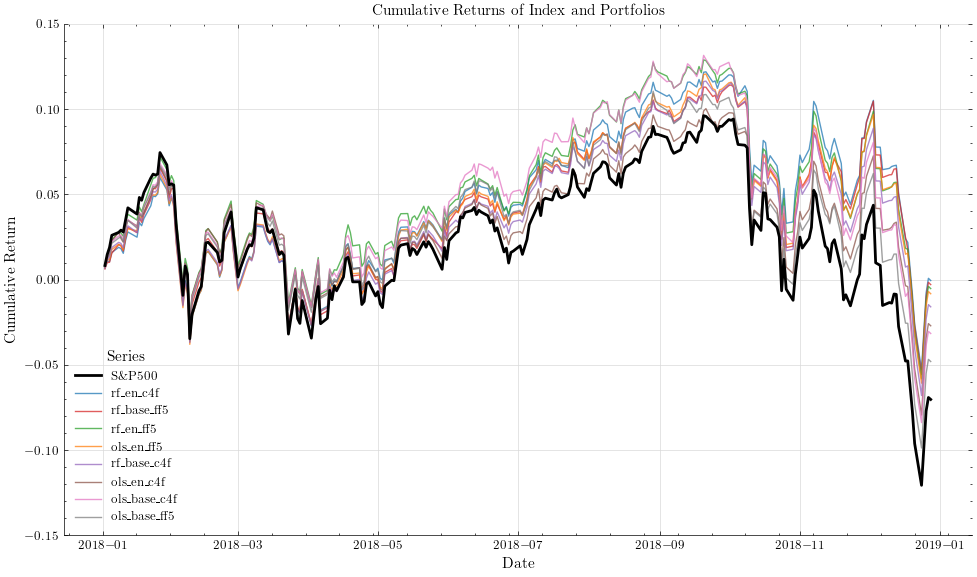

In [22]:
from returns_analysis import ReturnAnalyzer

an = ReturnAnalyzer(sp500ret, weighted_portfolio_returns,weighted_portfolio_excess)
latex = an.generate_apa_latex_table()   # -> copy into your LaTeX doc
fig   = an.plot_returns()               # -> save/show as needed

In [23]:
latex

'\n% \\usepackage{booktabs} must be included in the preamble.\n\\begin{table}[ht]\n\\centering\n\\caption*{\\textbf{Table 1}: \\textit{Descriptive Statistics of Index and Portfolio Returns}}\n\\label{tab:return_stats_1}\n\\begin{tabular}{lcccccccc}\n\\toprule\n{} & Cumulative Return & Annualised Return & Annualised Volatility & Alpha & Information Ratio & PSR (S*=0) & PSR (S*=0.1) \\\\\n\\midrule\nS\\&P500 & -7.03% & -7.08% & 17.06% & 0.00% & nan & nan & nan \\\\\nrf\\_en\\_c4f & -0.05% & -0.05% & 15.22% & 7.03% & 0.3021 & 0.4820 & 0.0522 \\\\\nrf\\_base\\_ff5 & -0.29% & -0.29% & 15.39% & 6.79% & 0.3004 & 0.4767 & 0.0508 \\\\\nrf\\_en\\_ff5 & -0.52% & -0.53% & 15.48% & 6.55% & 0.3077 & 0.4711 & 0.0493 \\\\\nols\\_en\\_ff5 & -0.83% & -0.83% & 15.45% & 6.25% & 0.3008 & 0.4631 & 0.0473 \\\\\nrf\\_base\\_c4f & -1.59% & -1.61% & 15.42% & 5.47% & 0.2893 & 0.4428 & 0.0423 \\\\\nols\\_en\\_c4f & -2.71% & -2.73% & 15.43% & 4.35% & 0.2668 & 0.4138 & 0.0360 \\\\\nols\\_base\\_c4f & -3.16% & -3.18